## Initialization of the Scripts

In [1]:
!pip install fredapi
!pip install ipympl
!pip install yfinance
!pip install mplfinance 
!pip install fear_and_greed
import fear_and_greed
from fredapi import Fred
import datetime
import time
import numpy as np
import yfinance as yf
import pandas as pd
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
from matplotlib import pyplot as plt
import mplfinance as mpf
from sp500_calc_test import Main_Calcn,MonthlyAndWeeklySIPReturnCalcn,MA_Invst_Return_Calcn,BollBandsReturnCalcn,MacdReturnCalcn,MA05MA10ReturnCalcn,MA_SIPReturnCalcn
from SIPReturnCalcn import SIPReturnCalcn

## Plot US Daily Treasury Yield Curve Rates in the past 365 days (US10YT & US20YT)
## Plot historical curve of VIX in the past 365 days
## Plot historical curve of SP500 price in the past 365 days
## Plot historical curve of Nasdaq100 price in the past 365 days
## Plot historical curve of Bit Coin price in the past 365 days
### [Fear and Greed Index](https://www.cnn.com/markets/fear-and-greed?utm_source=hp)

Fear and Greed Index = 28.60,fear


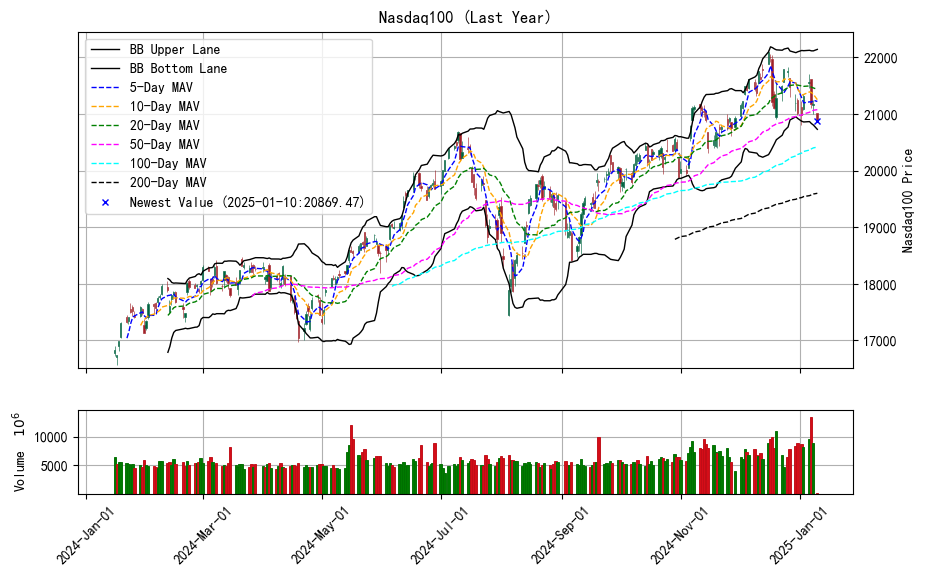

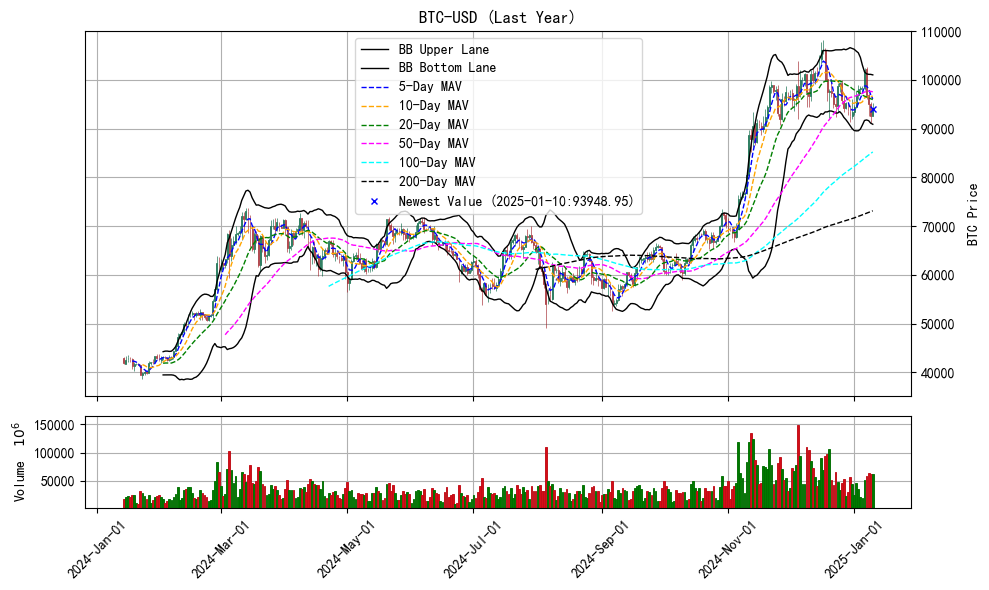

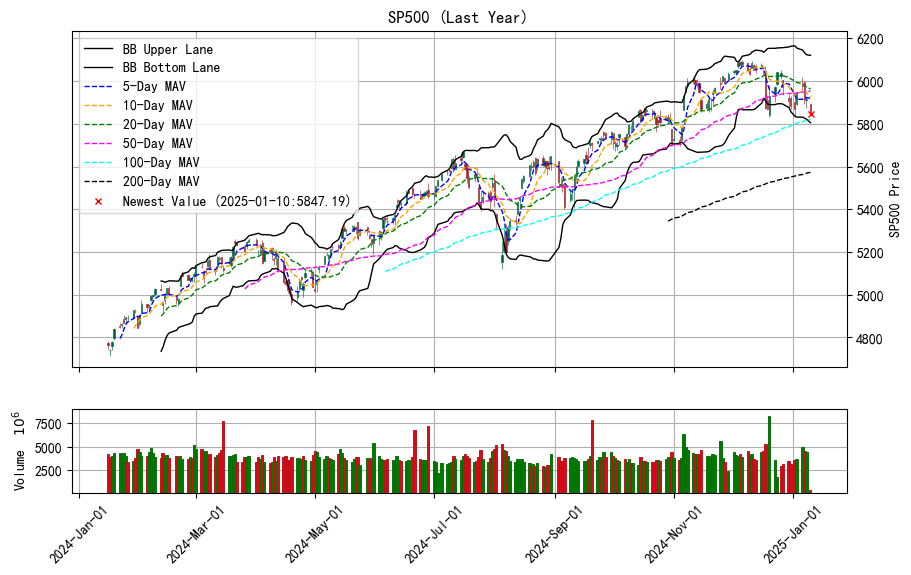

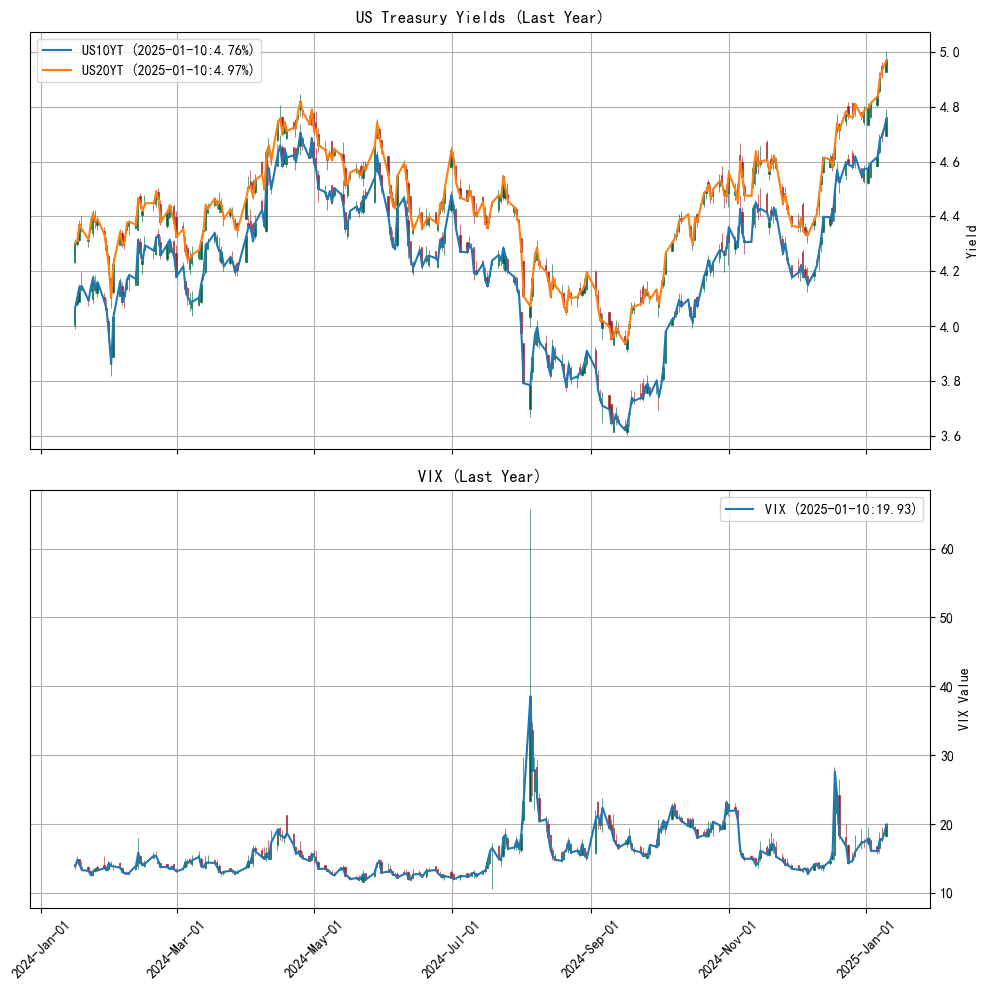

In [7]:
# 显示Fear and Greed Index
index = fear_and_greed.get()
print(f'Fear and Greed Index = {index.value:.2f},{index.description}')
# 获取 US10YT, US20YT数据
us10yt = yf.Ticker("^TNX")
us20yt = yf.Ticker("^TYX")
# 获取VIX的最新数据
vix = yf.Ticker('^VIX')

end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)

data_us10yt = us10yt.history(start=start_date, end=end_date)
data_us20yt = us20yt.history(start=start_date, end=end_date)
data_vix = vix.history(start=start_date, end=end_date)
data_sp500 = yf.Ticker("^GSPC").history(start=start_date, end=end_date)
data_nasdaq100 = yf.Ticker("^NDX").history(start=start_date, end=end_date)
data_btc = yf.Ticker("BTC-USD").history(start=start_date, end=end_date)
# 获取最新日期的收益率
latest_date = data_us10yt.index[-1]
latest_yield_us10yt = data_us10yt['Close'][-1]
latest_yield_us20yt = data_us20yt['Close'][-1]
latest_vix = data_vix['Close'][-1]
latest_sp500 = data_sp500['Close'][-1]
latest_nasdaq100 = data_nasdaq100['Close'][-1]
latest_btc = data_btc['Close'][-1]

# 绘制图表
# %matplotlib qt
%matplotlib inline
fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1]}, figsize=(10, 10),sharex=True)
mpf.plot(data_us10yt, type='candle', volume=False, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_us10yt.index, data_us10yt['Close'],label=f'US10YT ({data_us10yt.index[-1].date()}:{latest_yield_us10yt:.2f}%)')
mpf.plot(data_us20yt, type='candle', volume=False, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_us20yt.index, data_us20yt['Close'], label=f'US20YT ({data_us20yt.index[-1].date()}:{latest_yield_us20yt:.2f}%)')
ax1.set_title('US Treasury Yields (Last Year)')
ax1.set_ylabel('Yield')
ax1.legend()
ax1.grid(True)

mpf.plot(data_vix, type='candle', volume=False, ax=ax2, show_nontrading=True, returnfig=True, style='charles')
ax2.plot(data_vix.index, data_vix['Close'], label=f'VIX ({data_vix.index[-1].date()}:{latest_vix:.2f})')
ax2.set_title('VIX (Last Year)')
ax2.set_ylabel('VIX Value')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

%matplotlib qt
fig2, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_sp500, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=20).mean() + 2 * data_sp500['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=20).mean() - 2 * data_sp500['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index, data_sp500['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_sp500.index[-1], data_sp500['Close'][-1], 'rx', markersize=5,label=f'Newest Value ({data_sp500.index[-1].date()}:{latest_sp500:.2f})')
ax1.set_title('SP500 (Last Year)')
ax1.set_ylabel('SP500 Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

fig3, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_nasdaq100, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=20).mean() + 2 * data_nasdaq100['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=20).mean() - 2 * data_nasdaq100['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index, data_nasdaq100['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_nasdaq100.index[-1], data_nasdaq100['Close'][-1], 'bx', markersize=5,label=f'Newest Value ({data_nasdaq100.index[-1].date()}:{latest_nasdaq100:.2f})')
ax1.set_title('Nasdaq100 (Last Year)')
ax1.set_ylabel('Nasdaq100 Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

fig4, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6),sharex=True)
mpf.plot(data_btc, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=20).mean() + 2 * data_btc['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=20).mean() - 2 * data_btc['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--',linewidth=1)
ax1.plot(data_btc.index, data_btc['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--',linewidth=1)
ax1.plot(data_btc.index[-1], data_btc['Close'][-1], 'bx', markersize=5,label=f'Newest Value ({data_btc.index[-1].date()}:{latest_btc:.2f})')
ax1.set_title('BTC-USD (Last Year)')
ax1.set_ylabel('BTC Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)
plt.tight_layout()
plt.show()


## Plot K-Curve of the specified stock in the past 365 days  

In [5]:
# 获取指定股票数据
stock_ticker = 'PLTR'
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
stock_data = yf.Ticker(stock_ticker).history(start=start_date, end=end_date)
latest_stock_data = stock_data['Close'][-1]

# 获取财务数据
ticker = yf.Ticker(stock_ticker)
try:
    trailing_pe = ticker.info['trailingPE']
except Exception as e:
    trailing_pe = None
try:
    forward_pe = ticker.info['forwardPE']
except Exception as e:
    forward_pe = None
try:
    price_to_book = ticker.info['priceToBook']
except Exception as e:
    price_to_book = None
try:
    peg_ratio = ticker.info['trailingPegRatio']
except Exception as e:    
    peg_ratio = None
try:
    calendar = ticker.calendar
    if 'Earnings Date' in calendar and len(calendar['Earnings Date']) > 0:
        next_earnings_date = calendar['Earnings Date'][0]
    else:
        next_earnings_date = None
except Exception as e:
    next_earnings_date = None
    
# 计算MACD
exp12 = stock_data['Close'].ewm(span=12, adjust=False).mean()
exp26 = stock_data['Close'].ewm(span=26, adjust=False).mean()
macd = exp12 - exp26
signal = macd.ewm(span=9, adjust=False).mean()

# 计算KDJ
low_list = stock_data['Low'].rolling(window=14).min()
high_list = stock_data['High'].rolling(window=14).max()
rsv = (stock_data['Close'] - low_list) / (high_list - low_list) * 100
kdj_k = rsv.ewm(com=3).mean()
kdj_d = kdj_k.ewm(com=3).mean()
kdj_j = 3 * kdj_k - 2 * kdj_d

# 计算RSI
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# 绘制图表
%matplotlib qt
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, gridspec_kw={'height_ratios': [4, 1, 1, 1, 1]}, figsize=(10, 12), sharex=True)
mpf.plot(stock_data, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean() + 2 * stock_data['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean() - 2 * stock_data['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--', linewidth=1)
ax1.plot(stock_data.index[-1], stock_data['Close'][-1], 'rx', markersize=5, label=f'Newest Value ({stock_data.index[-1].date()}:{latest_stock_data:.2f})')
ax1.set_title(f'K-Curve of {stock_ticker} in last year\nTrailing PE: {trailing_pe}, Forward PE: {forward_pe}, PriceToBook: {price_to_book}, PEG Ratio: {peg_ratio}, Next Earnings Date: {next_earnings_date}')
ax1.set_ylabel('Stock Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

# 绘制MACD
ax3.plot(stock_data.index, macd, label='MACD', color='blue')
ax3.plot(stock_data.index, signal, label='Signal Line', color='red')
ax3.set_ylabel('MACD')
ax3.legend()
ax3.grid(True)

# 绘制KDJ
ax4.plot(stock_data.index, kdj_k, label='K', color='blue')
ax4.plot(stock_data.index, kdj_d, label='D', color='orange')
ax4.plot(stock_data.index, kdj_j, label='J', color='green')
ax4.axhline(y=20, color='gray', linestyle='--', linewidth=1) 
ax4.axhline(y=80, color='gray', linestyle='--', linewidth=1)
ax4.set_ylabel('KDJ')
ax4.legend()
ax4.grid(True)

# 绘制RSI
ax5.plot(stock_data.index, rsi, label='RSI', color='purple')
ax5.axhline(y=30, color='gray', linestyle='--', linewidth=1) 
ax5.axhline(y=70, color='gray', linestyle='--', linewidth=1)
ax5.set_ylabel('RSI')
ax5.legend()
ax5.grid(True)

plt.tight_layout()
plt.show()


## 计算指定股票在过去365天中用不同投资策略下的收益率

[*********************100%***********************]  1 of 1 completed


按月定投收益率 %:-19.5
按周定投收益率 %:-21.3


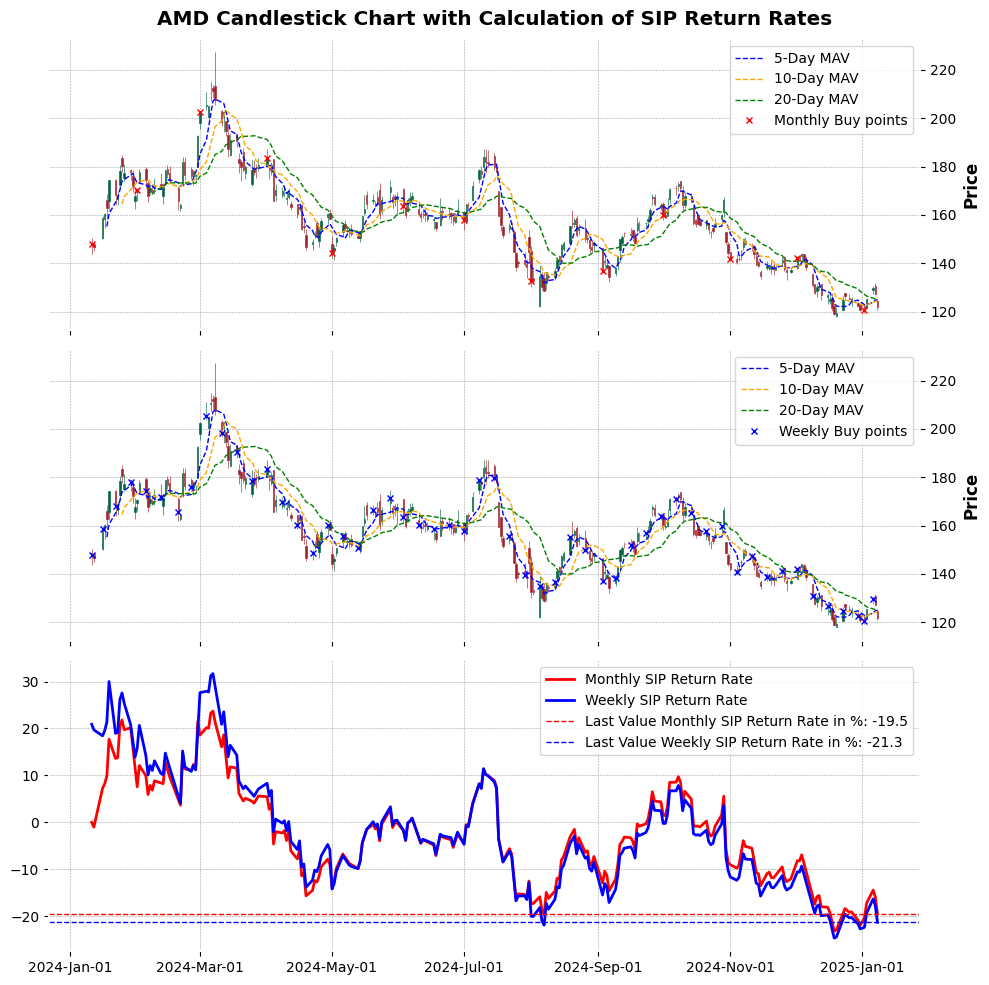

按MA5定投收益率 %:-21.7
按MA10定投收益率 %:-21.9
按MA20定投收益率 %:-23.2
按MA5和MA10的交叉定投收益率 %:-19.7
按MA10和MA20的交叉定投收益率 %:-25.9


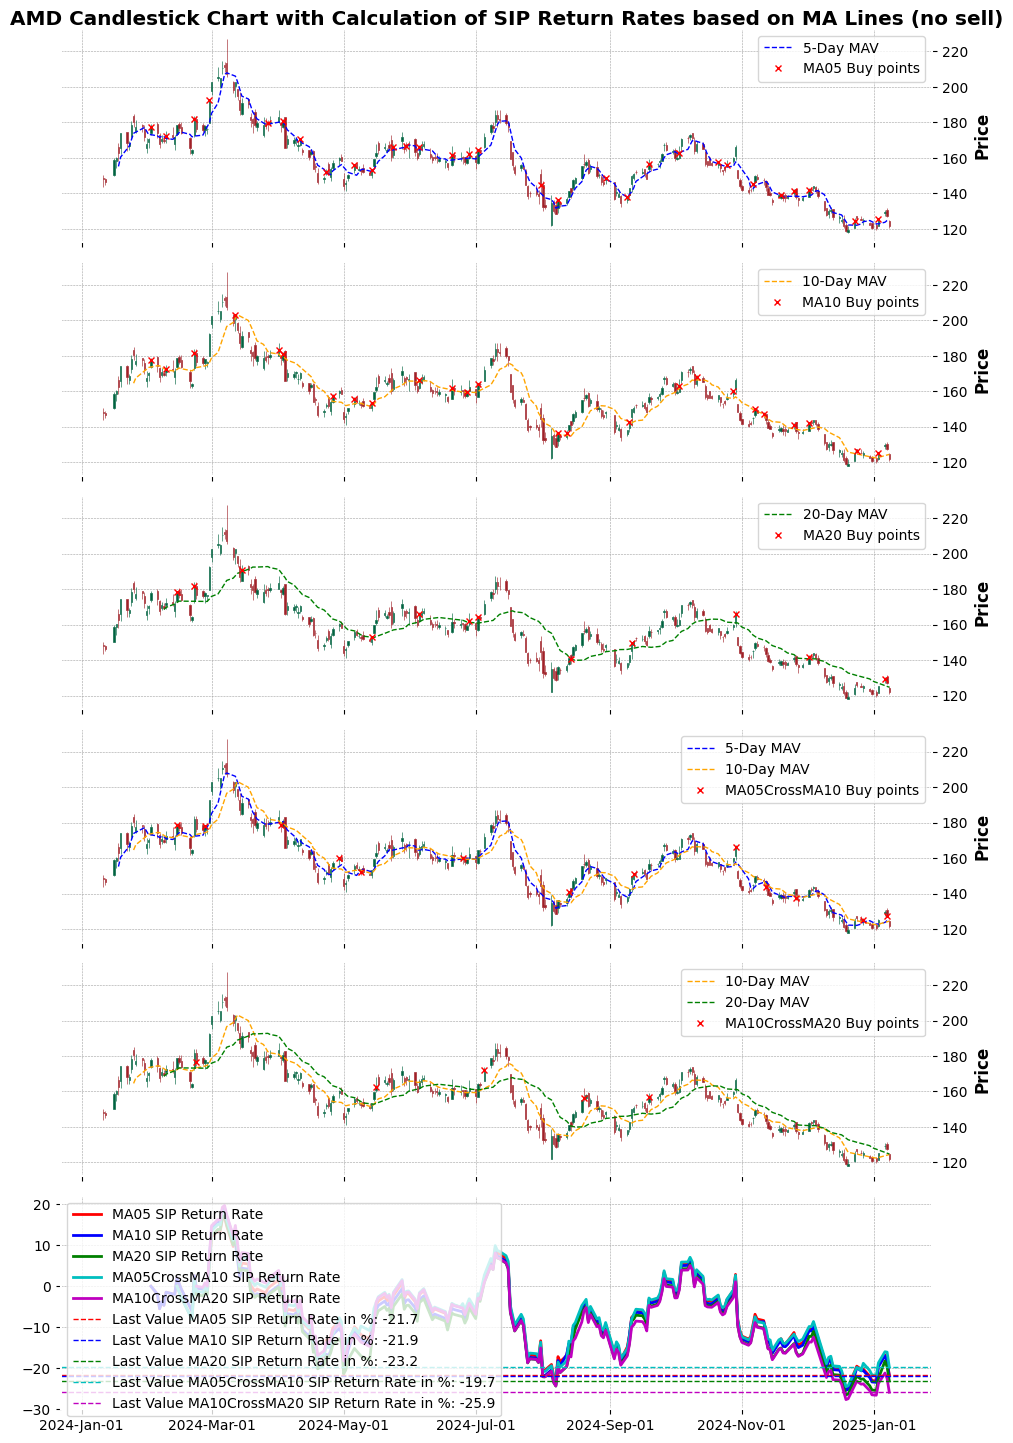

按MA5定投收益率 %:-26.9
按MA10定投收益率 %:-26.7
按MA20定投收益率 %:-24.5
按MA5和MA10的交叉定投收益率 %:-19.1


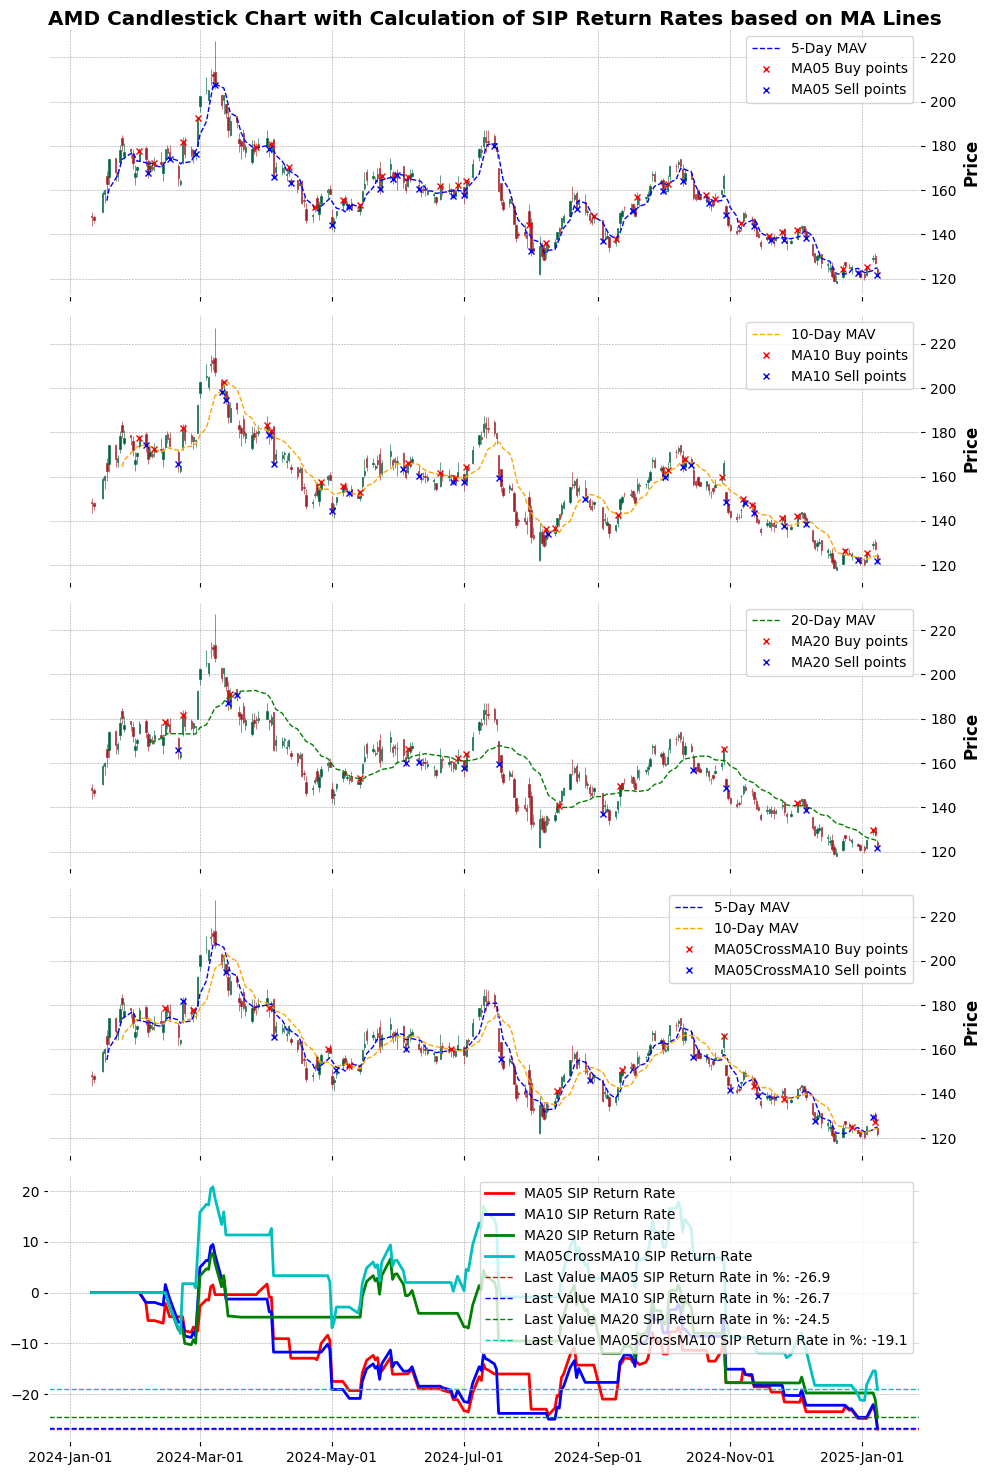

按BB上下轨投资收益率 %:9.8


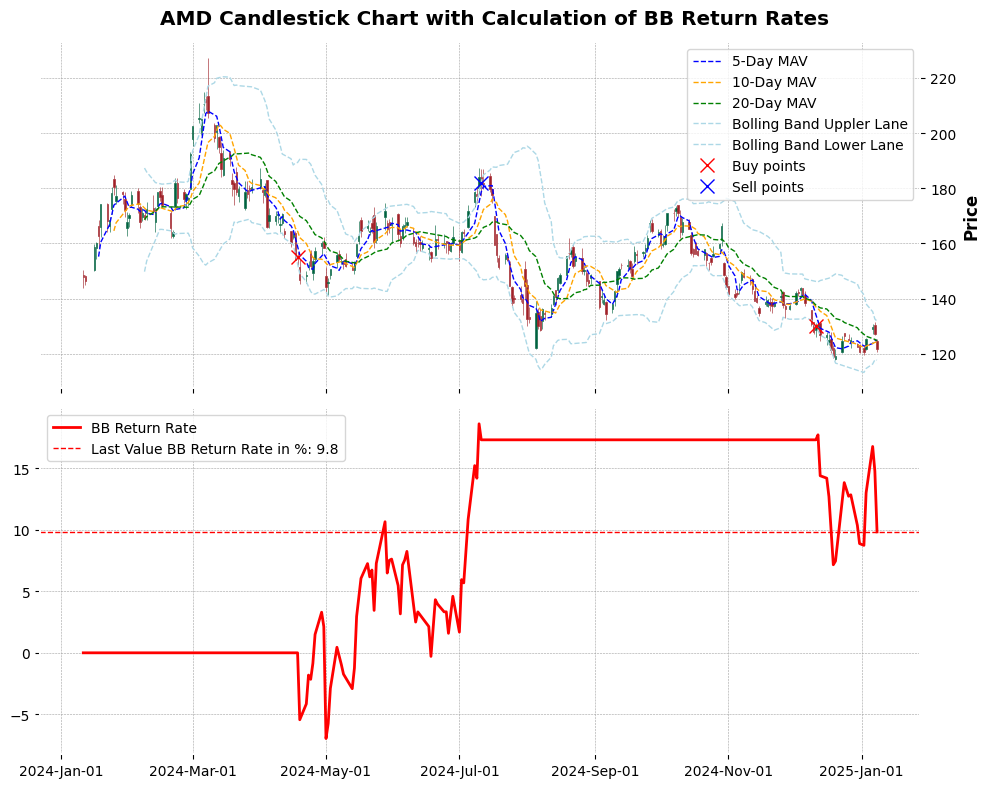

按MACD金叉死叉投资收益率 %:-8.6


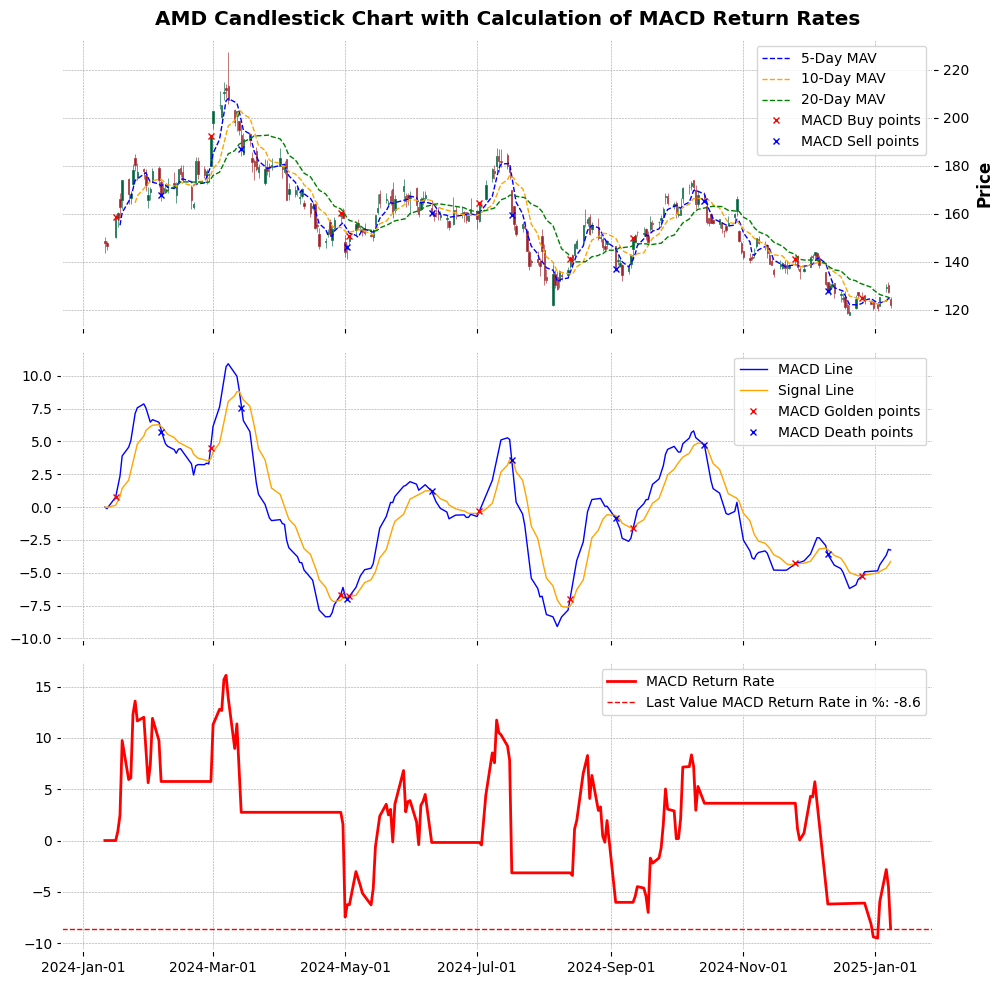

In [142]:
%matplotlib inline
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
SIPReturnCalcn('AMD',start_date,end_date)

## 计算SP500里所有股票用不同投资策略的投资回报率并保存结果到csv文件中

In [146]:
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
ReturnRateRes = Main_Calcn(start_date,end_date)
ReturnRateRes.to_csv('ReturnRateRes.csv',index=True)


Elapsed time: 1.2878 seconds
Elapsed time: 1.3404 seconds
Elapsed time: 1.2671 seconds
Elapsed time: 1.3256 seconds
Elapsed time: 1.3600 seconds
Elapsed time: 1.3217 seconds
Elapsed time: 1.2677 seconds
Elapsed time: 1.4604 seconds
Elapsed time: 1.3234 seconds
Elapsed time: 1.3527 seconds
Elapsed time: 1.3495 seconds
Elapsed time: 1.3957 seconds
Elapsed time: 1.3515 seconds
Elapsed time: 1.4056 seconds
Elapsed time: 1.3572 seconds
Elapsed time: 1.3695 seconds
Elapsed time: 1.3761 seconds
Elapsed time: 1.4585 seconds
Elapsed time: 1.3876 seconds
Elapsed time: 1.5579 seconds
Elapsed time: 1.4133 seconds
Elapsed time: 1.3919 seconds
Elapsed time: 1.3512 seconds
Elapsed time: 1.3515 seconds
Elapsed time: 1.3650 seconds
Elapsed time: 1.8124 seconds
Elapsed time: 1.5427 seconds
Elapsed time: 1.4825 seconds
Elapsed time: 1.3656 seconds
Elapsed time: 1.3534 seconds
Elapsed time: 1.6254 seconds
Elapsed time: 1.4414 seconds
Error on BollBandsReturnCalcn: index 0 is out of bounds for axis 0 with 

## 显示SP500里所有股票用不同投资策略的投资回报率的排序以及列出目前股价最接近布林带下限的股票

In [147]:
ReturnRateRes = pd.read_csv('ReturnRateRes.csv')
# 月定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of MonthlySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MonthlySIP']].to_string(index=False)
print(f'按照月定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 周定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of WeeklySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of WeeklySIP']].to_string(index=False)
print(f'按照周定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA05
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA05',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA05']].to_string(index=False)
print(f'按照5日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA10']].to_string(index=False)
print(f'按照10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA20
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA20',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA20']].to_string(index=False)
print(f'按照20日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA5CrossMA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA5CrossMA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA5CrossMA10']].to_string(index=False)
print(f'按照5日10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 最佳买入时机股票
top_20 = ReturnRateRes.sort_values(by='Distance of Close2BBLowerLim',ascending=True).head(20)
top_20_indices_and_values = top_20[['Ticker','Distance of Close2BBLowerLim']].to_string(index=False)
print(f'距离布林带下轨距离最小的股票(TOP20)列表如下:\n{top_20_indices_and_values}')

按照月定投收益最高的公司(TOP20)列表如下:
 Ticker  Return Rate of MonthlySIP
   PLTR                 151.664905
    VST                 107.420953
    UAL                  91.738463
  XIACF                  79.978950
   TSLA                  78.914553
    TPL                  78.585991
    GEV                  76.566397
   AXON                  71.306316
   AVGO                  58.621947
   TRGP                  53.426367
    TPR                  52.314287
BTC-USD                  51.687414
   NVDA                  45.473825
    RCL                  45.015701
    HWM                  43.206143
   ANET                  42.590687
   GDDY                  41.420215
    SYF                  40.856912
    FOX                  39.643634
    TSM                  39.598536
按照周定投收益最高的公司(TOP20)列表如下:
 Ticker  Return Rate of WeeklySIP
   PLTR                134.712237
    VST                 98.748159
    UAL                 91.311037
   TSLA                 79.759358
  XIACF                 77.707431
    GEV    

In [14]:
print(ReturnRateRes.columns)


Index(['Ticker', 'Return Rate of MA05', 'Return Rate of MA10',
       'Return Rate of MA20', 'Return Rate of MonthlySIP',
       'Return Rate of WeeklySIP', 'Distance of Close2BBLowerLim',
       'Return Rate of MA5CrossMA10', 'Return Rate of MA05_WoSell',
       'Return Rate of MA10_WoSell', 'Return Rate of MA20_WoSell',
       'Return Rate of MA05CrossMA10_WoSell',
       'Return Rate of MA10CrossMA20_WoSell', 'Return Rate of MACD',
       'Return Rate of BB'],
      dtype='object')
